# Task

In the four files `a.npy`, `b.npy`, `c.npy` and `d.npy` you will find four matrices encoded in the standard `numpy.array` format. Characterize all three matrices based on the statistical properties of their eigenvalue spectrum (eigenvalues and level spacings) and answer the following questions:

- Which matrix can represent a Hamiltonian of a chaotic quantum system and why?
- Which matrix can represent a Hamiltonian of a chaotic system with time reversal symmetry and why? 
- Which matrix can represent a Hamiltonian of a dynamical system and why?


you can simply read in the files using `numpy`'s `load` [function](https://numpy.org/doc/stable/reference/generated/numpy.load.html). 


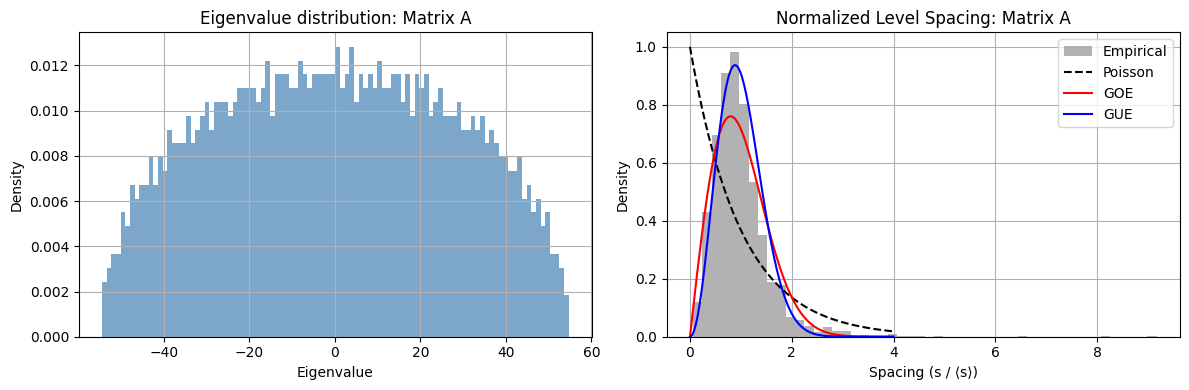

A:
  Mean spacing: 0.0728
  Std spacing: 0.0459
  Min spacing: 4.3405e-03
  Max spacing: 6.6758e-01



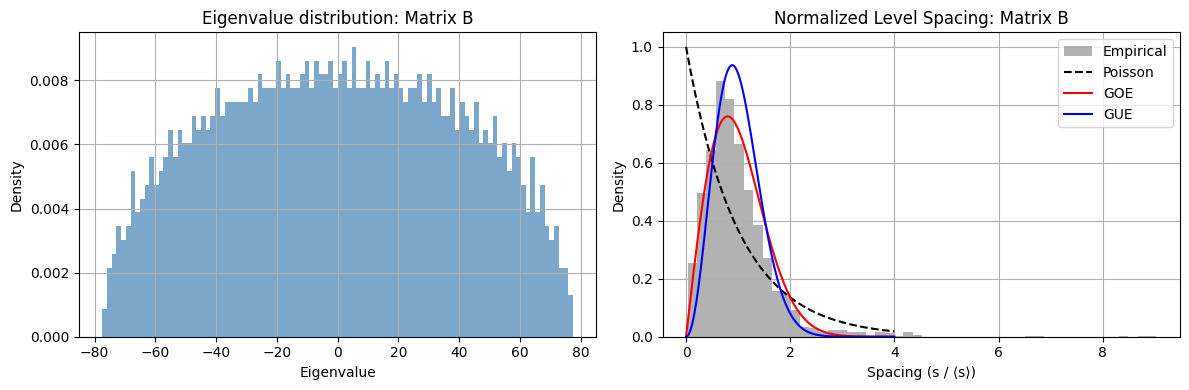

B:
  Mean spacing: 0.1033
  Std spacing: 0.0770
  Min spacing: 3.0458e-03
  Max spacing: 9.3249e-01



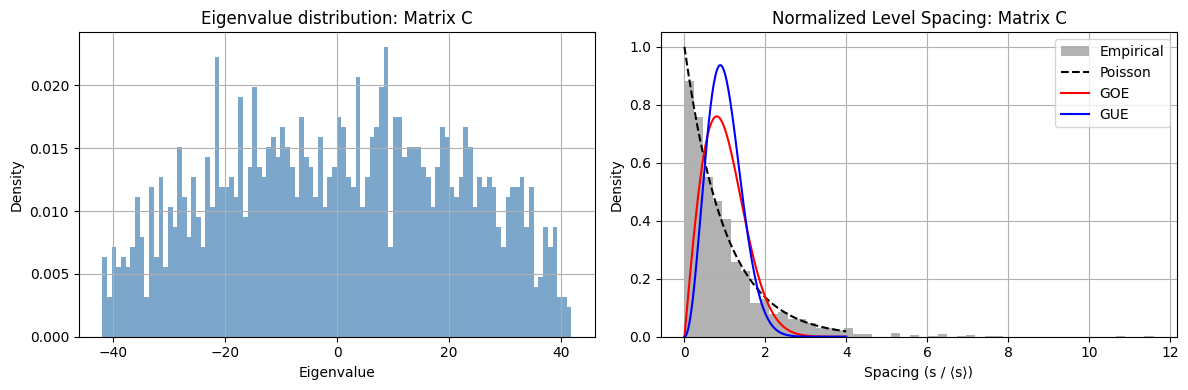

C:
  Mean spacing: 0.0559
  Std spacing: 0.0613
  Min spacing: 3.4400e-05
  Max spacing: 6.4819e-01



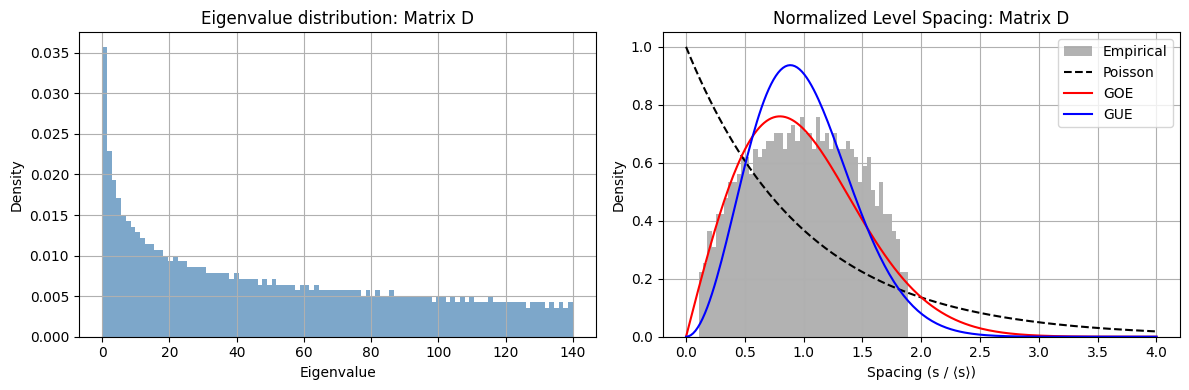

D:
  Mean spacing: 0.1401
  Std spacing: 0.0631
  Min spacing: 1.5503e-02
  Max spacing: 2.6482e-01



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load matrices
A = np.load('a.npy')
B = np.load('b.npy')
C = np.load('c.npy')
D = np.load('d.npy')

def theoretical_distributions(x):
    p_poisson = np.exp(-x)
    p_goe = (np.pi / 2) * x * np.exp(-np.pi * x**2 / 4) # beta 1 
    p_gue = (32 / np.pi**2) * x**2 * np.exp(-4 * x**2 / np.pi)
    return p_poisson, p_goe, p_gue

def analyze_matrix(M, name):
    eigvals = np.linalg.eigvalsh(M)  # Use eigvalsh for Hermitian matrices
    eigvals = np.sort(eigvals)
    spacings = np.diff(eigvals)

    
    norm_spacings = spacings / np.mean(spacings)

    # Prepare theoretical curves
    x = np.linspace(0, 4, 200)
    p_poisson, p_goe, p_gue = theoretical_distributions(x)

    # Plot
    plt.figure(figsize=(12, 4))

    # Eigenvalue histogram
    plt.subplot(1, 2, 1)
    plt.hist(eigvals, bins=100, density=True, alpha=0.7, color='steelblue')
    plt.title(f'Eigenvalue distribution: Matrix {name}')
    plt.xlabel('Eigenvalue')
    plt.ylabel('Density')
    plt.grid(True)

    # Level spacing histogram
    plt.subplot(1, 2, 2)
    plt.hist(norm_spacings, bins=50, density=True, alpha=0.6, label='Empirical', color='gray')
    plt.plot(x, p_poisson, 'k--', label='Poisson')
    plt.plot(x, p_goe, 'r-', label='GOE')
    plt.plot(x, p_gue, 'b-', label='GUE')
    plt.title(f'Normalized Level Spacing: Matrix {name}')
    plt.xlabel('Spacing (s / ⟨s⟩)')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Summary stats
    print(f"{name}:")
    print(f"  Mean spacing: {np.mean(spacings):.4f}")
    print(f"  Std spacing: {np.std(spacings):.4f}")
    print(f"  Min spacing: {np.min(spacings):.4e}")
    print(f"  Max spacing: {np.max(spacings):.4e}")
    print()

# Analyze all matrices
for M, name in zip([A, B, C, D], ['A', 'B', 'C', 'D']):
    analyze_matrix(M, name)


If the histogram matches GOE (red): likely a chaotic system with time-reversal symmetry.

If it matches GUE (blue): chaotic system without time-reversal symmetry.

If it matches Poisson (black): likely an integrable or regular dynamical system.

/home/codespace/.local/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_histograms_impl.py:857: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/home/codespace/.local/lib/python3.12/site-packages/numpy/lib/_histograms_impl.py:900: ComplexWarning: Casting complex values to real discards the imaginary part
  db = np.array(np.diff(bin_edges), float)
/home/codespace/.local/lib/python3.12/site-packages/matplotlib/axes/_axes.py:7127: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16


Text(0.5, 0, 'Value')

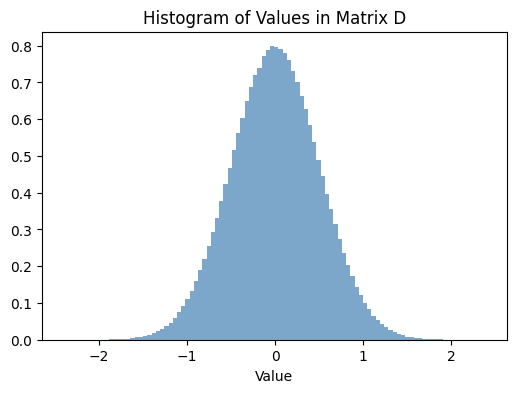

In [19]:
#histogram of vlues in D
plt.figure(figsize=(6, 4))
plt.hist(A.flatten(), bins=100, density=True, alpha=0.7, color='steelblue')
plt.title('Histogram of Values in Matrix D')
plt.xlabel('Value')